# Data Science Technical Interview

## Part 1: Experiment design

### Challenge
Since the professional photography service consumes so many operational and financial resources, AirBnB management are unsure if they should continue. AirBnB management have asked the Data Science team to analyse the impact of the professional photography service in order to determine whether or not they should continue funding the service.

Provide full details about how you will run experiments to assess the impact of this service on both hosts and guests. How will you ensure that the experiments are valid and not biased?

## Experimental design

#### -APPROPIATED PLANING
conducting, analyzing & interpreting controlled tests to elevate the factors that influece the outcome

#### -Causality research
identify the cause and effects insights, the results let us propose actionnable strategies

#### WorkFlow

1. What is the goal? determine the measurement for the objectives
2. What to test? identify the factors for the test
3. How to conduct? Determine the way to conduct & measure
4. How to measure it? the right statistical analysis
5. Will it be credible? The required sample size
6. How to analyse the data? Apply the statistical analysis
7. What is next? Conclusions

### Analysis plan

1. formulate a question in advance: Does the Profesionnal Photographie improves the values and the quantity of the reservation? each prperty improves they numbers when it adquires the photo services? how much can increase the listing price?

2. sample preparation

for seasonabilties reasons, we choose to compare during a all week the two types of products: 
with and without profesional photographie. We select all the properties that did adquired the photo services, we clusterize them and searche for ones with similar characteristics without profesional photografies in their publication
to do that we need to take a similar number of each case and clusterize it, to avoid COFOUNDING our data.


paying attention to:
- property size
- number of rooms
- location/ relation w/t price inside the same city
- profesional hosts or regular (check by the number of listings that they have)
- time(when the photos are published)
- prize range


3. test conduction: statistical inference

with the samples taken and clusterized, we can apply to it some descriptive statistics looking for the prices variances fot the two categories in each cluster:
- total numbers
- means, std, min, max, var,scatterplots
- five points summary, barplots
- correlation matrix
- n-product, linear regresion



4. Measurment

linear regression, probability

hypothese testing:
- H0: with the profesional photos, i can increase 20% the value of the propertie and mantain or increase the number of reservation.
- H1: the number of reservations decreases

6. how to measure

comparing the prices, the number of reservations, units are asambled int by the same features. 

7. Coclusions

## Part 2: Result analysis

In [3]:
import pandas as pd
import numpy as np
import json
import re

In [14]:
df = pd.read_json(r'C:\Users\Migue Granica\Desktop\IronHack\career week\technical-interview\data\intervals_challenge.json', lines=True)

In [15]:
df

duration distance                    started_at  \
0           857     5384 2016-10-03 13:00:00.286999941   
1           245     1248 2016-10-03 13:00:00.852999926   
2          1249     5847 2016-10-03 13:00:01.670000076   
3           471     2585 2016-10-03 13:00:01.841000080   
4           182      743 2016-10-03 13:00:01.970000029   
...         ...      ...                           ...   
165165       NA       NA 2016-10-04 20:36:10.846999884   
165166       NA       NA 2016-10-04 20:36:12.719000101   
165167       NA       NA 2016-10-04 20:36:14.763000011   
165168       NA       NA 2016-10-04 20:36:15.957999945   
165169       NA       NA 2016-10-04 20:36:20.473999977   

                                 trip_id                        vehicle_id  \
0       c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1       427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2       757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3       d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4       00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
...                                  ...                               ...   
165165  d2f81b419daddb90bd701ab9870f47a3  05e4532a59b7bfe65894335d1bc83e4d   
165166  73a07d4504036997306e0e3330529294  bed6dd187f23b3e8d956bb0d1ab0524a   
165167  d98c047d565bd488b17e08594965c479  31cd2f19d27c0c0c0ca386de72866a81   
165168  ce9a7ae5f76667c9f92b149a1b345a2d  4a555013634506246eed5d801ffbe526   
165169  469dff3624a9a37bb986157750fb73e8  27b7111eb7046e253c9896eee617b02e   

         city_id                    type  
0         pentos  driving_to_destination  
1       volantis         going_to_pickup  
2         pentos  driving_to_destination  
3         bravos         going_to_pickup  
4         pentos         going_to_pickup  
...          ...                     ...  
165165  volantis  driving_to_destination  
165166  volantis       waiting_for_rider  
165167    bravos  driving_to_destination  
165168  volantis  driving_to_destination  
165169  volantis         going_to_pickup  

[165170 rows x 7 columns]

## Data cleaning

In [16]:
df.isna().sum()

duration      0
distance      0
started_at    0
trip_id       0
vehicle_id    0
city_id       0
type          0
dtype: int64

In [17]:
df.dtypes

duration              object
distance              object
started_at    datetime64[ns]
trip_id               object
vehicle_id            object
city_id               object
type                  object
dtype: object

In [18]:
df['duration'] = pd.to_numeric(df.duration, errors='coerce')
df['distance'] = pd.to_numeric(df.distance, errors='coerce')

In [20]:
df.isna().sum()

duration      1157
distance      1157
started_at       0
trip_id          0
vehicle_id       0
city_id          0
type             0
dtype: int64

In [147]:
df_1 = df.dropna()

In [148]:
df_1.describe(include='all')

duration      distance                     started_at  \
count   164013.000000  1.640130e+05                         164013   
unique            NaN           NaN                         163856   
top               NaN           NaN  2016-10-03 16:39:25.497999907   
freq              NaN           NaN                              2   
first             NaN           NaN  2016-10-03 13:00:00.286999941   
last              NaN           NaN  2016-10-04 20:36:06.243000031   
mean       432.959534  1.944164e+03                            NaN   
std        559.097970  7.230917e+03                            NaN   
min          0.000000  0.000000e+00                            NaN   
25%         55.000000  1.900000e+01                            NaN   
50%        246.000000  6.080000e+02                            NaN   
75%        616.000000  2.349000e+03                            NaN   
max      48654.000000  1.218089e+06                            NaN   

                                 trip_id                        vehicle_id  \
count                             164013                            164013   
unique                             58392                              4741   
top     afacd04e18402f482e950ecc17c9f998  6661ee4bee90709e97c50a6bcb5ac682   
freq                                  10                               149   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       city_id             type  
count   164013           164013  
unique       3                3  
top     pentos  going_to_pickup  
freq    112817            58211  
first      NaN              NaN  
last       NaN              NaN  
mean       NaN              NaN  
std        NaN              NaN  
min        NaN              NaN  
25%        NaN              NaN  
50%        NaN              NaN  
75%        NaN              NaN  
max        NaN              NaN

In [149]:
def remove_outlier(df_in, col_name):
    
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    #fence_low  = q1-1.5*iqr
    #fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > q1-1.5*iqr) & (df_in[col_name] < q3+1.5*iqr)]
        
    return df_out

In [151]:
df_a = remove_outlier(df_1, 'duration')
df_2 = remove_outlier(df_a, 'distance')

In [152]:
df_2['trip_trav'] = np.where(df_2.trip_id.str.startswith(tuple(str(i) for i in range(9))), 'road', 'linear')

<ipython-input-152-b43632ee5a7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['trip_trav'] = np.where(df_2.trip_id.str.startswith(tuple(str(i) for i in range(9))), 'road', 'linear')


In [176]:
df_2['trip_hour'] = df_2.started_at.dt.hour
df_2['trip_vel'] = df_2.distance/df_2.duration

<ipython-input-176-b55b71096340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['trip_hour'] = df_2.started_at.dt.hour
<ipython-input-176-b55b71096340>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['trip_vel'] = df_2.distance/df_2.duration


In [178]:
df_3 = df_2.loc[df_2.trip_vel!=0]

In [155]:
df_2.head()

duration  distance                    started_at  \
0     857.0    5384.0 2016-10-03 13:00:00.286999941   
1     245.0    1248.0 2016-10-03 13:00:00.852999926   
2    1249.0    5847.0 2016-10-03 13:00:01.670000076   
3     471.0    2585.0 2016-10-03 13:00:01.841000080   
4     182.0     743.0 2016-10-03 13:00:01.970000029   

                            trip_id                        vehicle_id  \
0  c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2  757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   

    city_id                    type trip_trav  trip_hour  
0    pentos  driving_to_destination    linear         13  
1  volantis         going_to_pickup      road         13  
2    pentos  driving_to_destination      road         13  
3    bravos         going_to_pickup    linear         13  
4    pentos         going_to_pickup      road         13

In [156]:
df_3.started_at[0]

Timestamp('2016-10-03 13:00:00.286999941')

In [144]:
df_1['start_date'] = [d.date() for d in df_1['started_at']]
df_1['start_time'] = [d.time() for d in df_1['started_at']]

<ipython-input-144-ecab648e8299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['start_date'] = [d.date() for d in df_1['started_at']]
<ipython-input-144-ecab648e8299>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['start_time'] = [d.time() for d in df_1['started_at']]


## Descriptive Statistics

In [157]:
pd.crosstab(df_2['trip_trav'],df_2['city_id'])

city_id    bravos  pentos  volantis
trip_trav                          
linear       5691   44518     13116
road         7432   57901     17598

In [258]:
df_piv = pd.pivot_table(df_2, values=['duration','distance'], index=['city_id','trip_trav','type'],
              aggfunc={'duration':[ min, max,  np.mean, np.std],
                       'distance':[ min, max, np.mean, np.std]})

In [266]:
df_2_piv = pd.pivot_table(df_2, values=['duration','distance'], index=['city_id','trip_trav','type','trip_hour'],
              aggfunc={'duration':[ min, max,  np.mean, np.std],
                       'distance':[ min, max, np.mean, np.std]}).reset_index()

In [267]:
df_2_piv.columns = ['_'.join(col) for col in df_2_piv.columns]
df_2_piv

city_id_ trip_trav_                   type_  trip_hour_  distance_max  \
0      bravos     linear  driving_to_destination           0       15859.0   
1      bravos     linear  driving_to_destination           1       18540.0   
2      bravos     linear  driving_to_destination           2       18391.0   
3      bravos     linear  driving_to_destination           3       18526.0   
4      bravos     linear  driving_to_destination           4       18804.0   
..        ...        ...                     ...         ...           ...   
427  volantis       road       waiting_for_rider          19         939.0   
428  volantis       road       waiting_for_rider          20        5034.0   
429  volantis       road       waiting_for_rider          21        2534.0   
430  volantis       road       waiting_for_rider          22        5491.0   
431  volantis       road       waiting_for_rider          23        1787.0   

     distance_mean  distance_min  distance_std  duration_max  duration_mean  \
0      4739.795455        1524.0   2730.724604        2796.0     842.750000   
1      6911.178571        1500.0   5136.729440        1816.0     877.500000   
2      8957.034483          35.0   5662.150251        2585.0    1025.862069   
3     10680.900000        1408.0   6006.409808        1606.0    1002.566667   
4      7317.538462           0.0   5991.198785        2984.0     951.128205   
..             ...           ...           ...           ...            ...   
427      28.484791           0.0     88.408181        1362.0      84.549430   
428      41.387409           0.0    263.752228        1065.0      94.113801   
429      45.156997           0.0    183.710787        1471.0      95.686007   
430      45.914634           0.0    303.469957        2308.0      94.480488   
431      34.847500           0.0    150.591946        1424.0      88.000000   

     duration_min  duration_std  
0           235.0    432.445298  
1           371.0    357.683959  
2             7.0    520.358511  
3           251.0    323.313628  
4             5.0    545.720681  
..            ...           ...  
427           2.0    143.502648  
428           2.0    147.528833  
429           2.0    154.670364  
430           2.0    177.940379  
431           2.0    145.695893  

[432 rows x 12 columns]

In [159]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

### Data Visualization

Text(0.5, 1.0, 'duration and distance of trips')

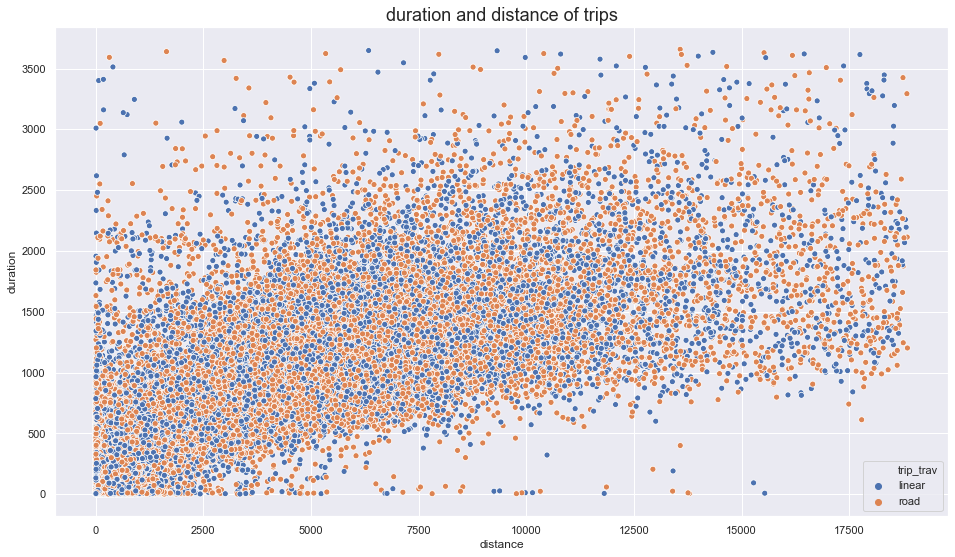

In [169]:
plt.figure(figsize=(16,9))
ax = sns.scatterplot(x='distance', y='duration', hue='trip_trav', data=df_2)
ax.set_title('duration and distance of trips', fontsize=18)

Text(0.5, 1.0, 'trips by distance')

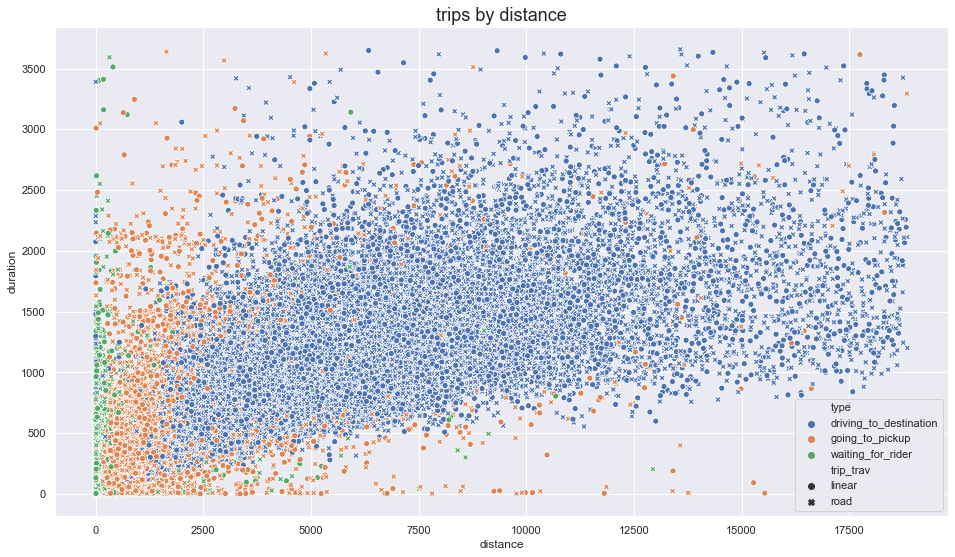

In [161]:
plt.figure(figsize=(16,9))
ax=sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2, )
ax.set_title('trips by distance', fontsize=18)

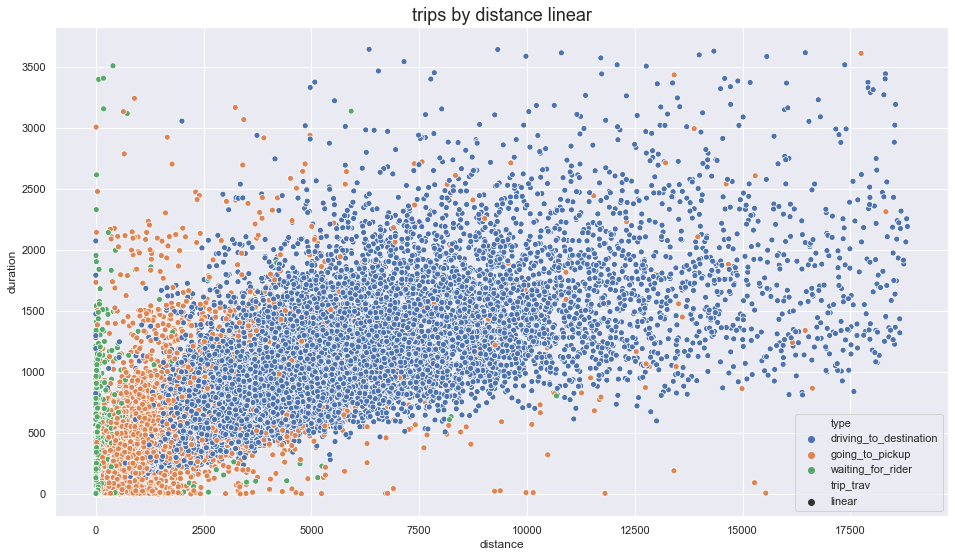

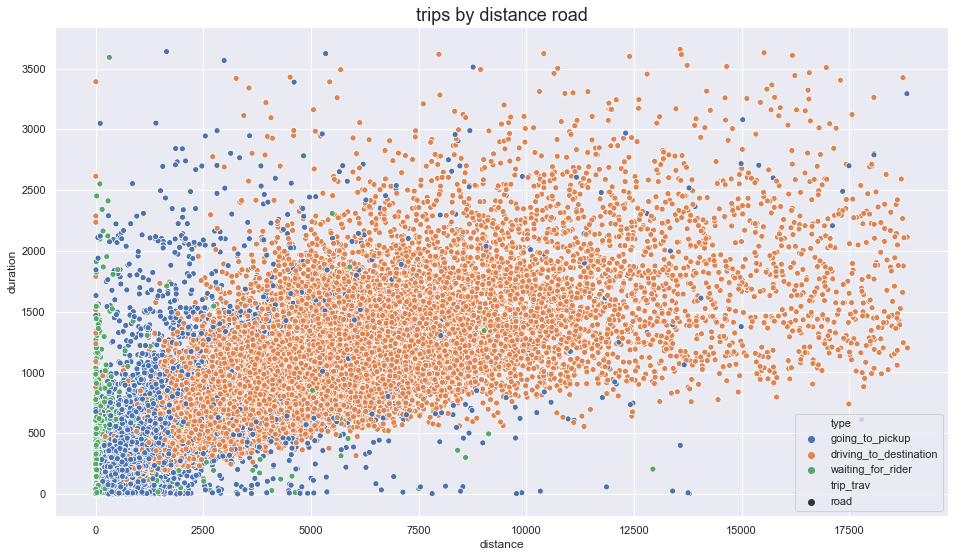

In [162]:
travel =['linear','road']

for i in travel:

    plt.figure(figsize=(16,9))
    ax=sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2.loc[df_2['trip_trav']==i] )
    ax.set_title(f'trips by distance {i}', fontsize=18)

Text(0.5, 1.0, 'trips by dist in Pentos')

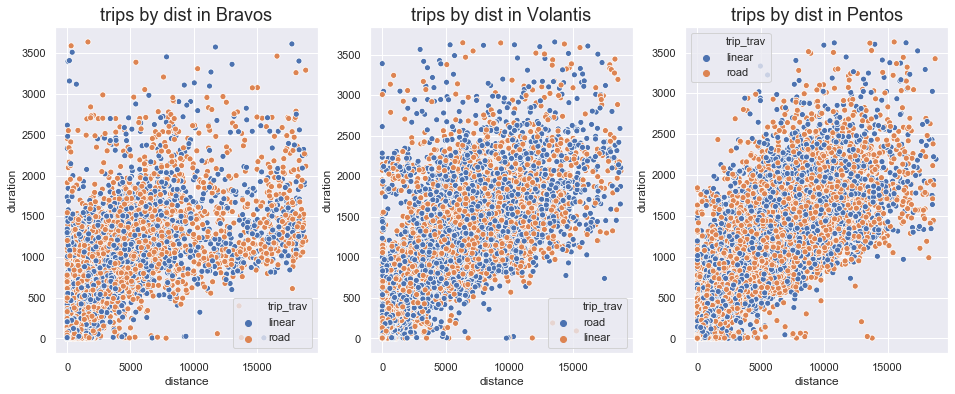

In [163]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
sns.scatterplot(x='distance', y='duration', hue='trip_trav', data=df_2.loc[df_2.city_id=='bravos'], ax=ax1)
ax1.set_title('trips by dist in Bravos', fontsize=18)
sns.scatterplot(x='distance', y='duration', hue='trip_trav', data=df_2.loc[df_2.city_id=='volantis'], ax= ax2)
ax2.set_title('trips by dist in Volantis', fontsize=18)
sns.scatterplot(x='distance', y='duration', hue='trip_trav', data=df_2.loc[df_2.city_id=='pentos'], ax=ax3)
ax3.set_title('trips by dist in Pentos', fontsize=18)

Text(0.5, 1.0, 'trips by dist in Pentos')

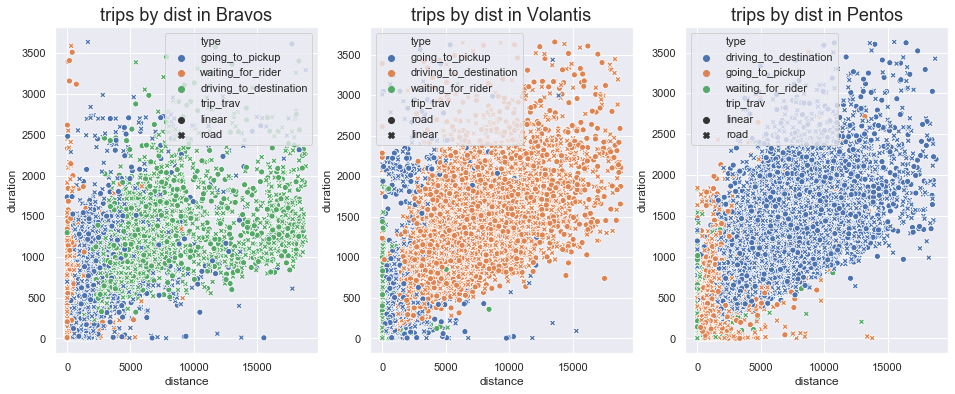

In [164]:


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2.loc[df_2.city_id=='bravos'], ax=ax1)
ax1.set_title('trips by dist in Bravos', fontsize=18)
sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2.loc[df_2.city_id=='volantis'], ax= ax2)
ax2.set_title('trips by dist in Volantis', fontsize=18)
sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2.loc[df_2.city_id=='pentos'], ax=ax3)
ax3.set_title('trips by dist in Pentos', fontsize=18)

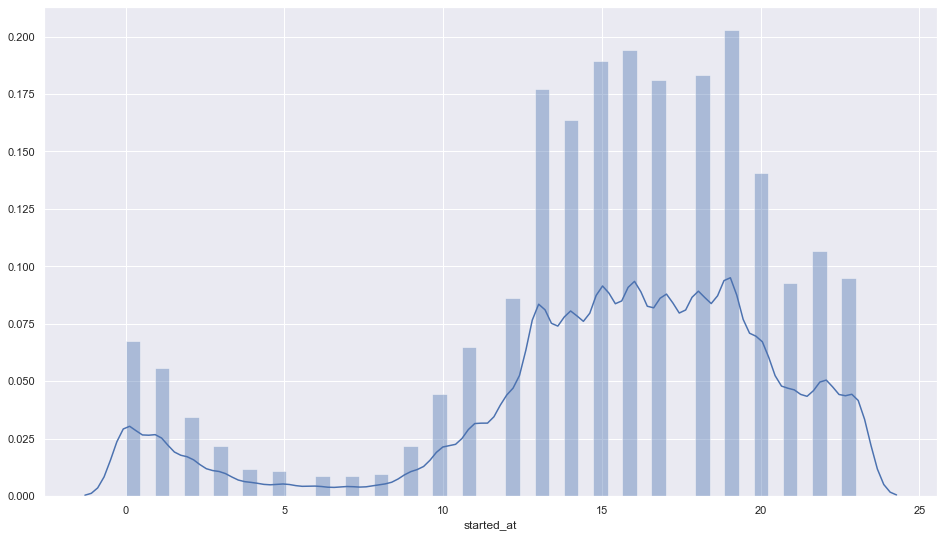

In [165]:
plt.figure(figsize=(16,9))
ax = sns.distplot(df_2.started_at.dt.hour )

Text(0, 0.5, 'Hours')

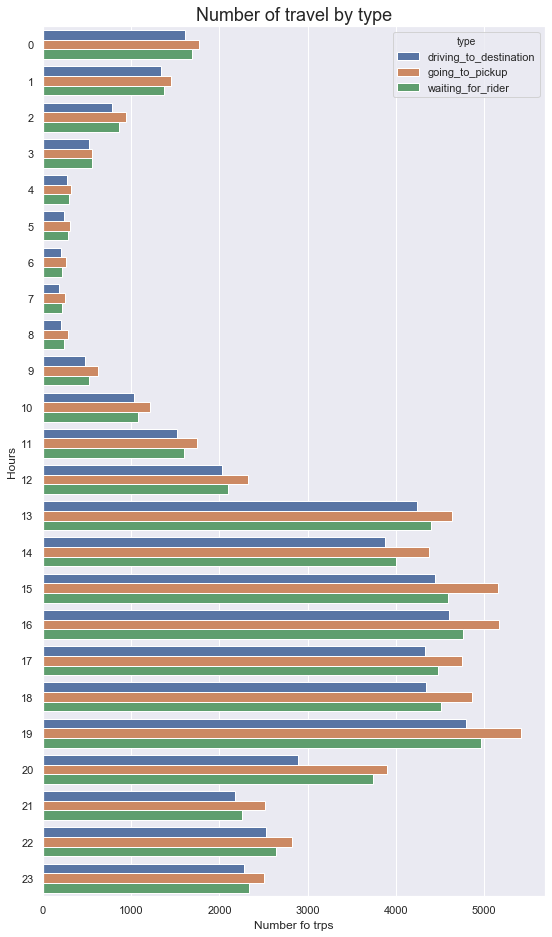

In [174]:
plt.figure(figsize=(9,16))
ax = sns.countplot(y=df_2.started_at.dt.hour, hue="type", data=df_2)
ax.set_title('Number of travel by type', fontsize=18)
ax.set_xlabel('Number fo trps')
ax.set_ylabel('Hours')

Text(0, 0.5, 'Hours')

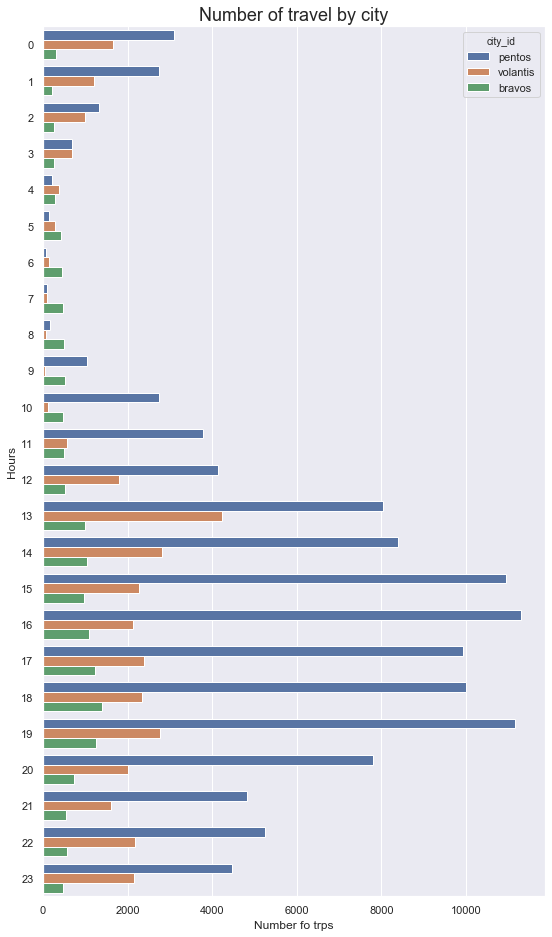

In [166]:
plt.figure(figsize=(9,16))
ax = sns.countplot(y=df_2.started_at.dt.hour, hue="city_id", data=df_2)
ax.set_title('Number of travel by city', fontsize=18)
ax.set_xlabel('Number fo trps')
ax.set_ylabel('Hours')

Text(0, 0.5, 'Hours')

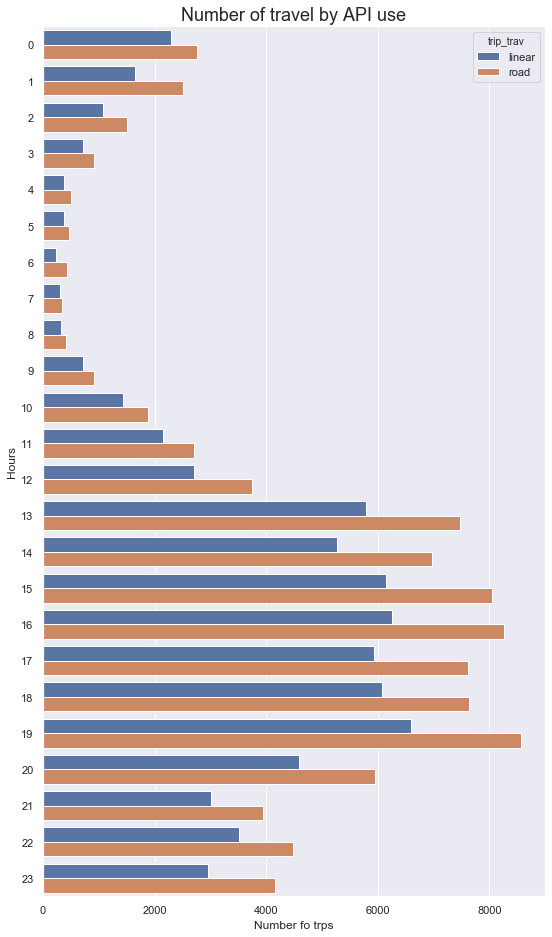

In [197]:
plt.figure(figsize=(9,16))
ax = sns.countplot(y=df_2.started_at.dt.hour, hue="trip_trav", data=df_2)
ax.set_title('Number of travel by API use', fontsize=18)
ax.set_xlabel('Number fo trps')
ax.set_ylabel('Hours')

In [245]:
list(df_2_piv.city_id_.unique())

['bravos', 'pentos', 'volantis']

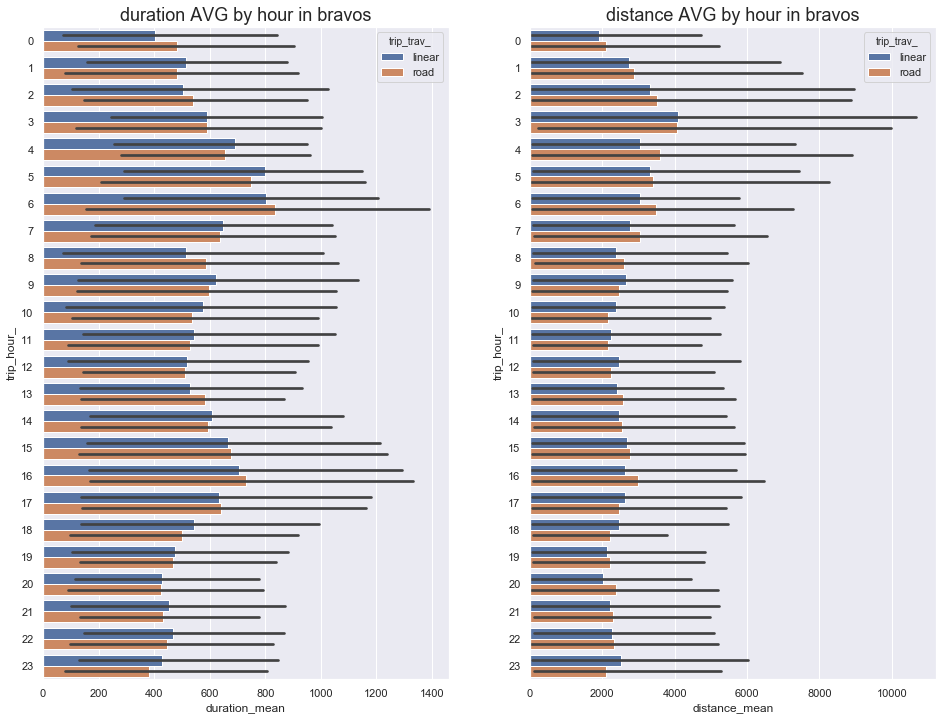

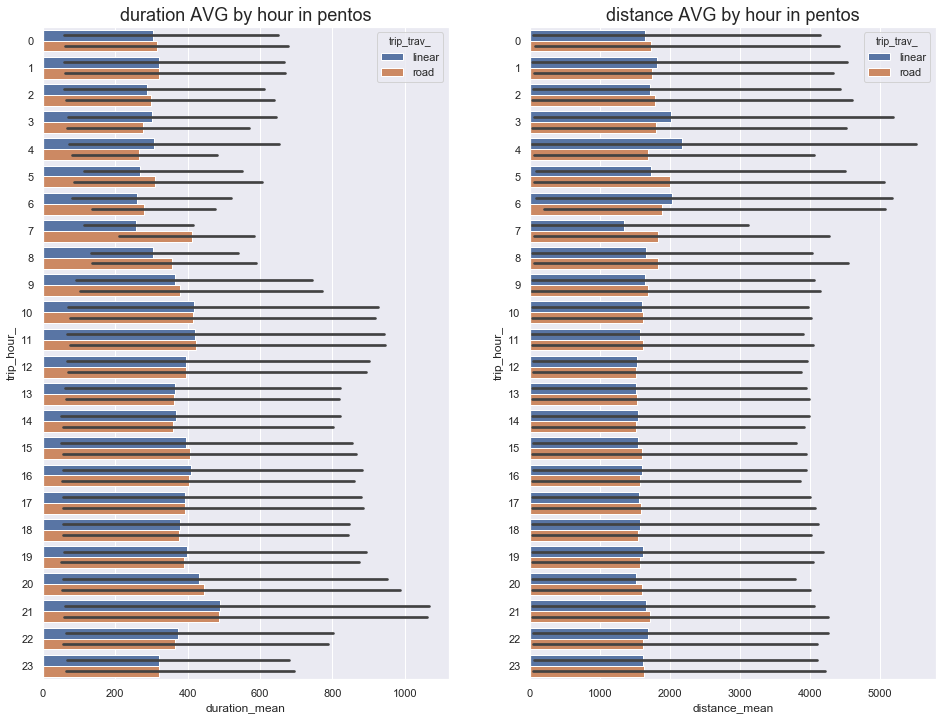

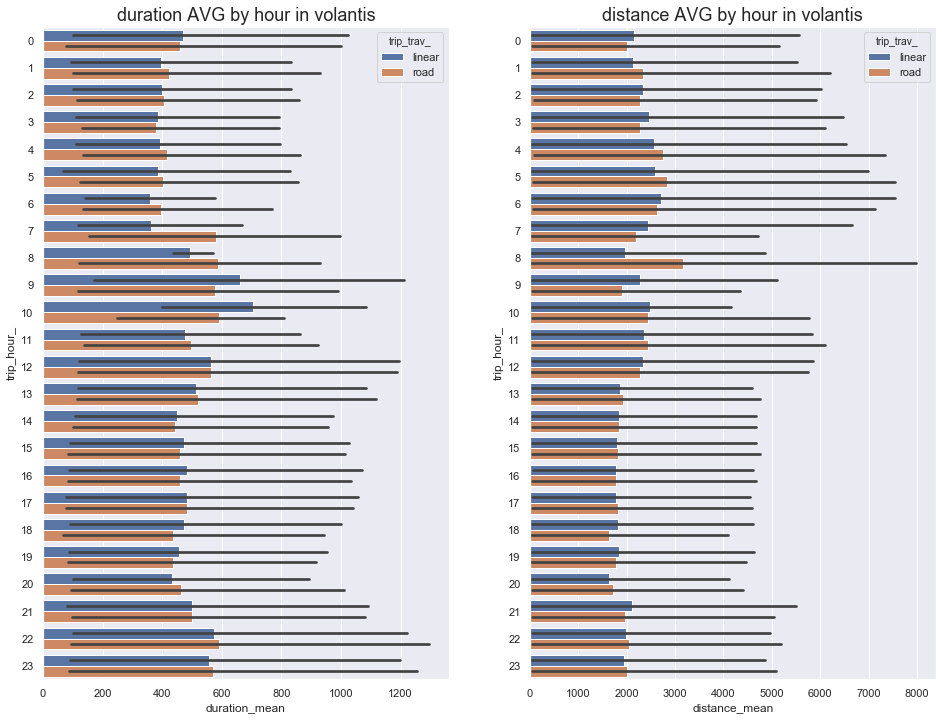

In [247]:
cities = ['bravos', 'pentos', 'volantis']

for city in cities:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,12))
    sns.barplot(x='duration_mean', y='trip_hour_', hue="trip_trav_", data=df_2_piv.loc[df_2_piv['city_id_']==city], orient='h', ax=ax1 )
    ax1.set_title(f'duration AVG by hour in {city}', fontsize=18)
    sns.barplot(x='distance_mean', y='trip_hour_', hue="trip_trav_", data=df_2_piv.loc[df_2_piv['city_id_']==city], orient='h', ax=ax2 )
    ax2.set_title(f'distance AVG by hour in {city}', fontsize=18)

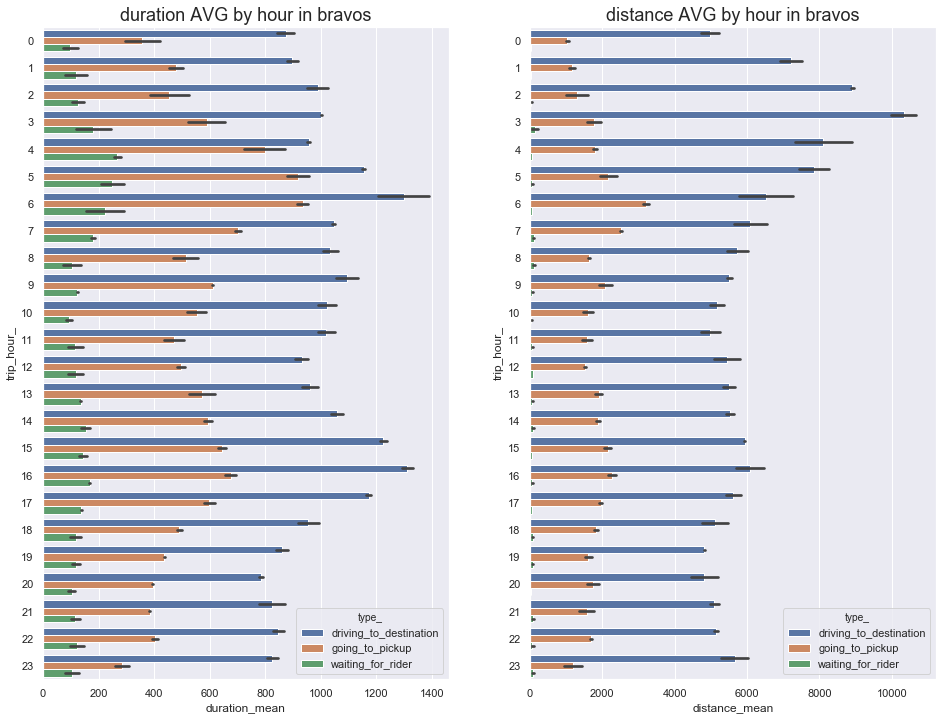

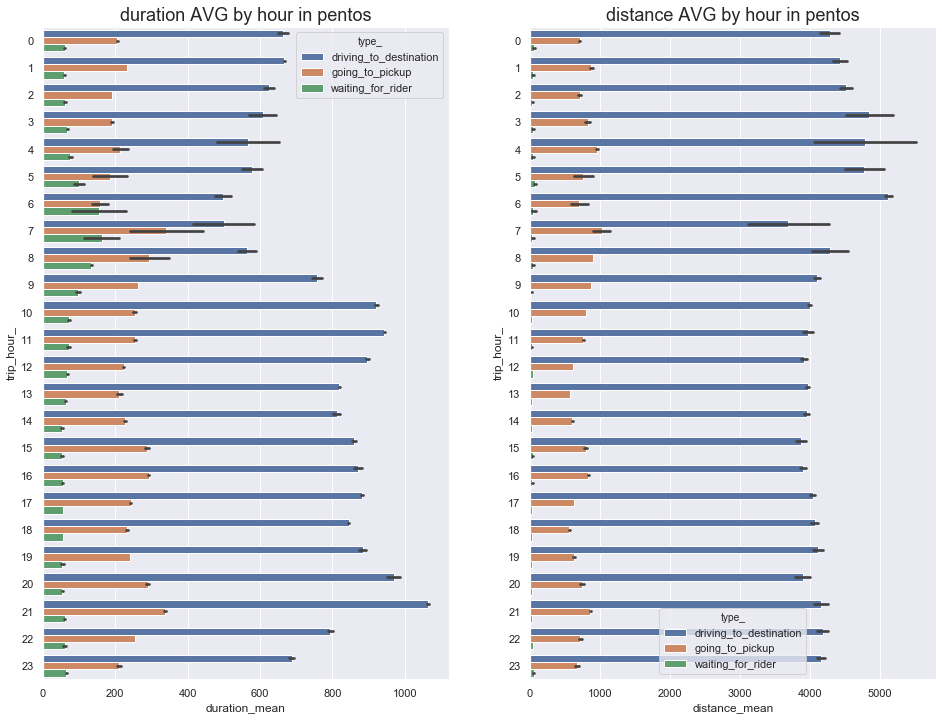

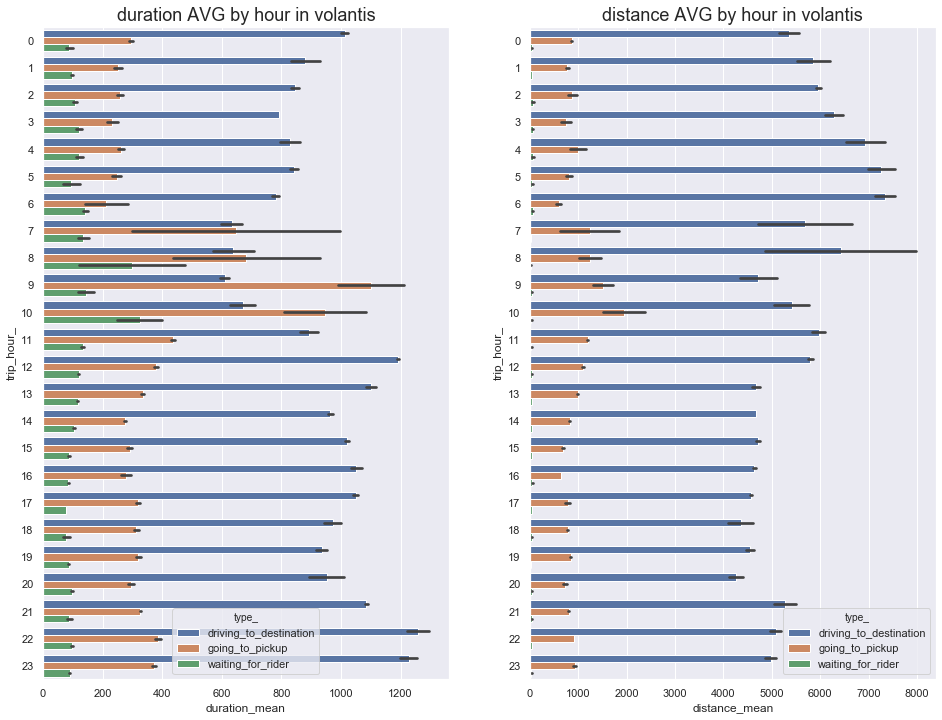

In [250]:
cities = ['bravos', 'pentos', 'volantis']

for city in cities:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,12))
    sns.barplot(x='duration_mean', y='trip_hour_', hue="type_", data=df_2_piv.loc[df_2_piv['city_id_']==city], orient='h', ax=ax1 )
    ax1.set_title(f'duration AVG by hour in {city}', fontsize=18)
    sns.barplot(x='distance_mean', y='trip_hour_', hue="type_", data=df_2_piv.loc[df_2_piv['city_id_']==city], orient='h', ax=ax2 )
    ax2.set_title(f'distance AVG by hour in {city}', fontsize=18)

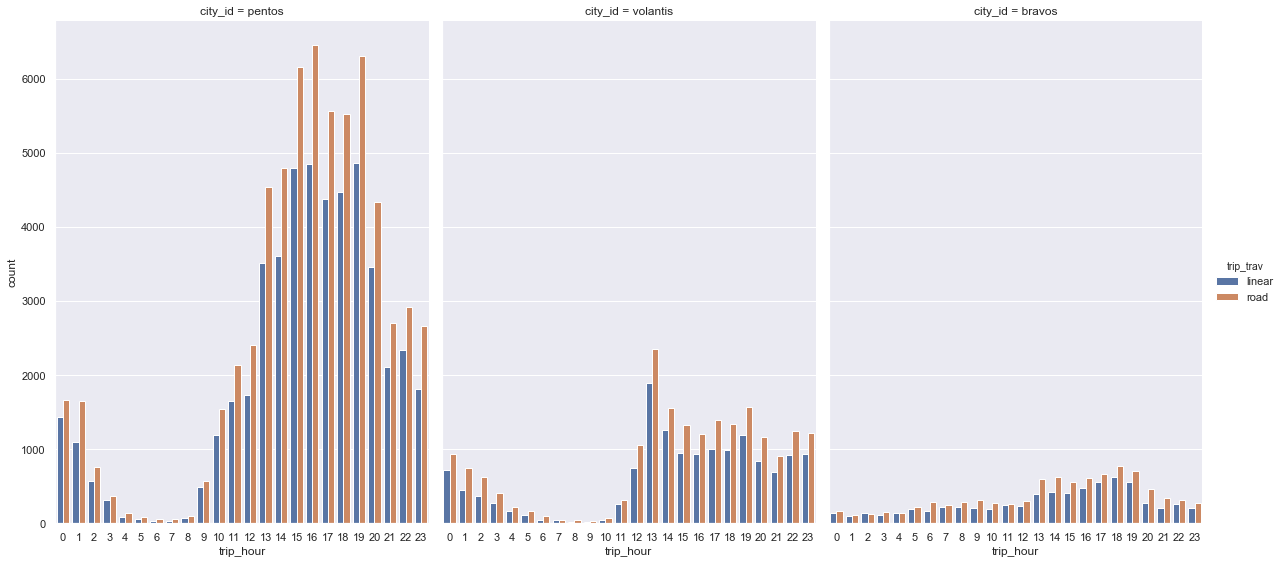

In [168]:
g = sns.catplot(x='trip_hour', hue="trip_trav", col="city_id",
                data=df_2, kind="count",
                height=8, aspect=.7);

<ipython-input-251-d7dcaf9f28f7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))


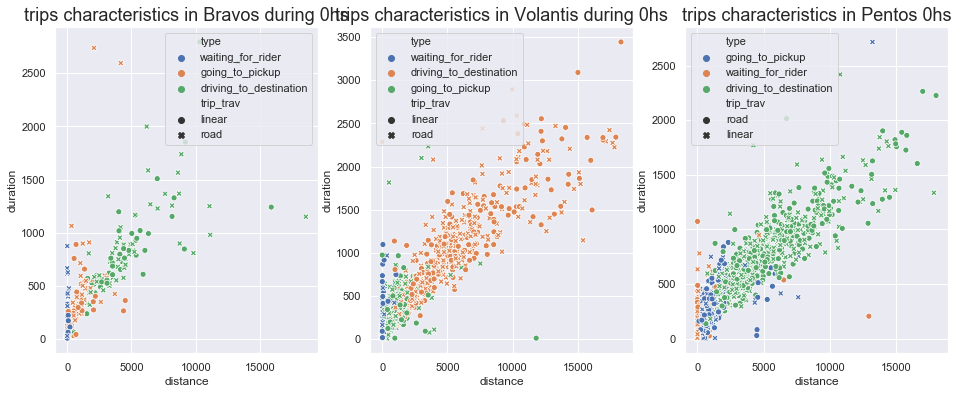

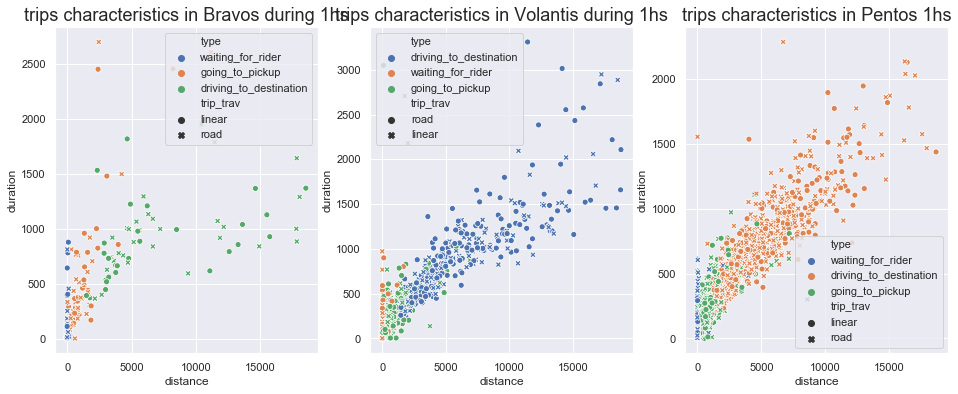

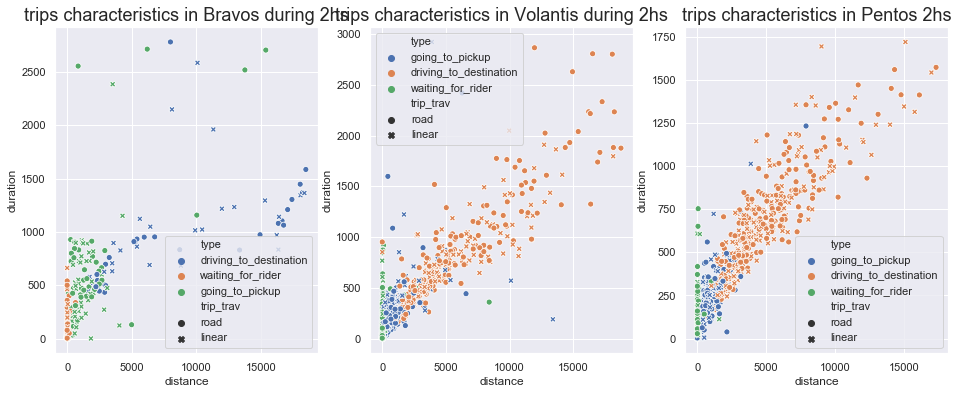

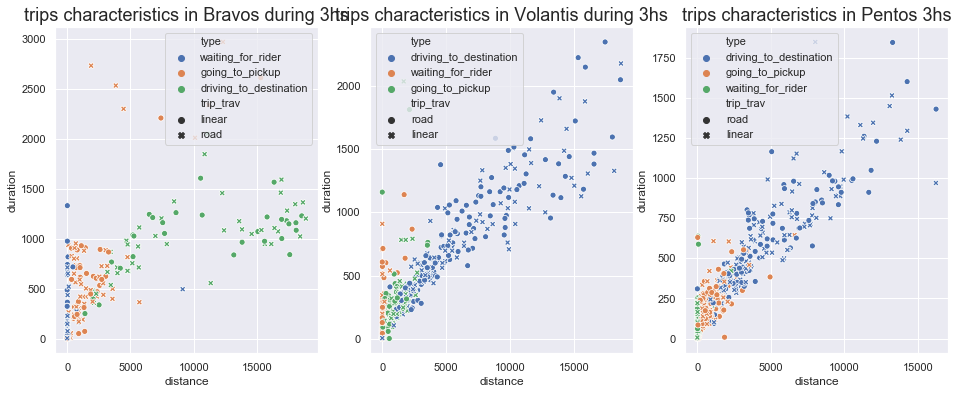

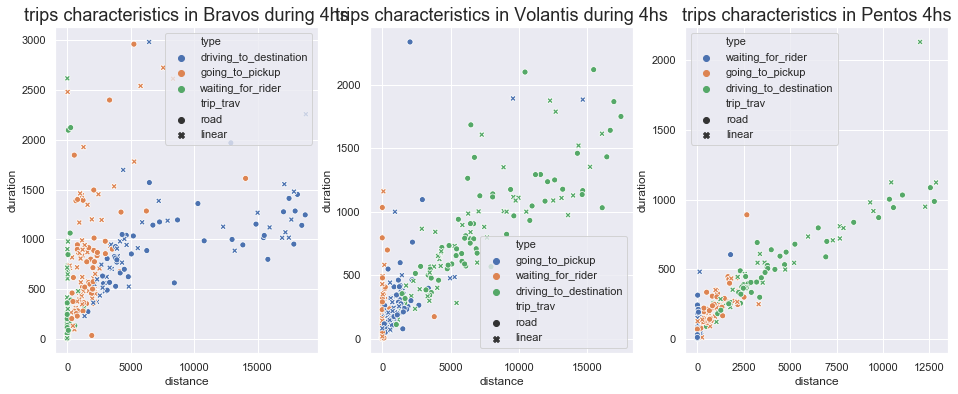

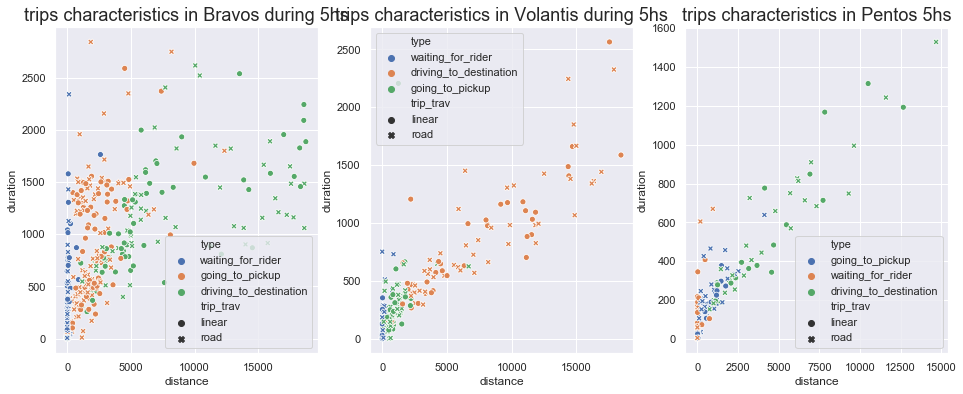

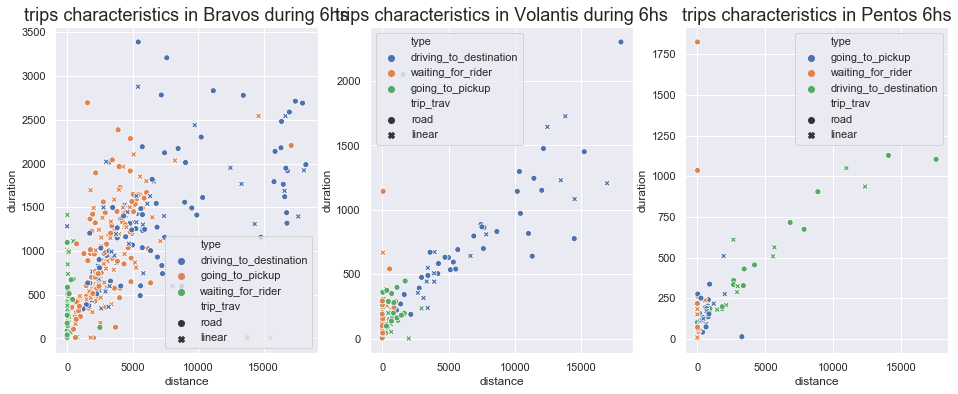

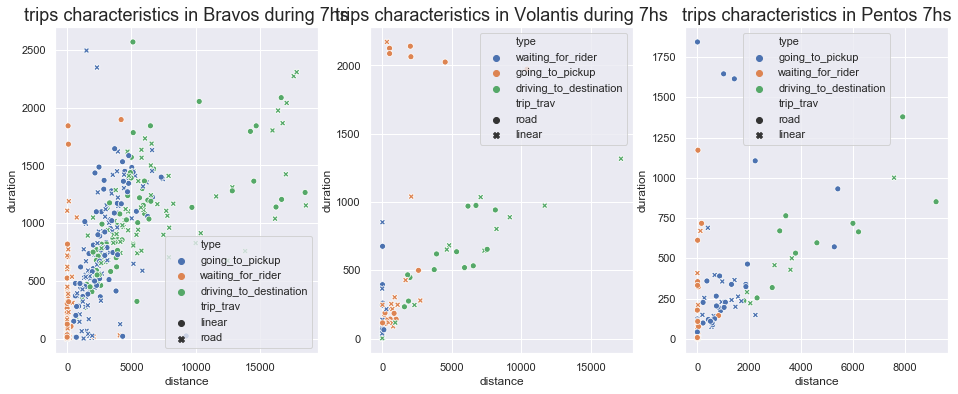

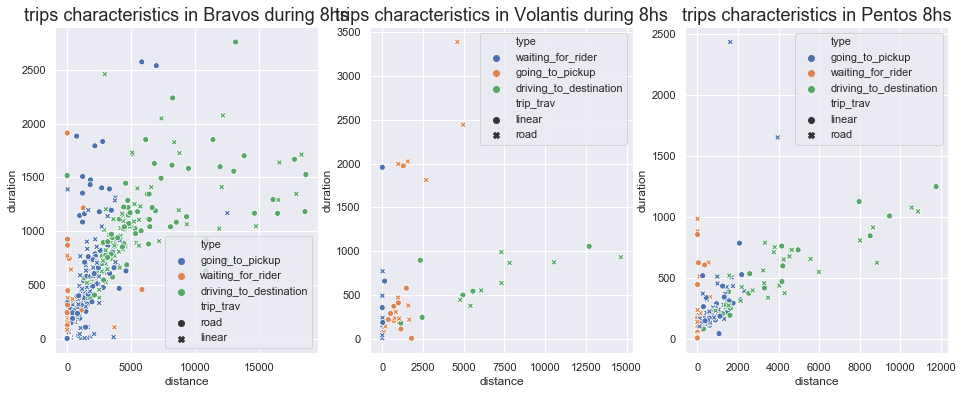

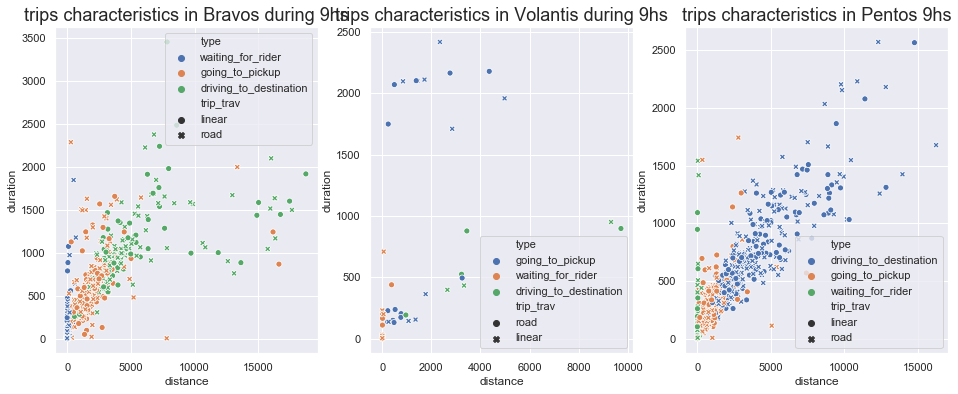

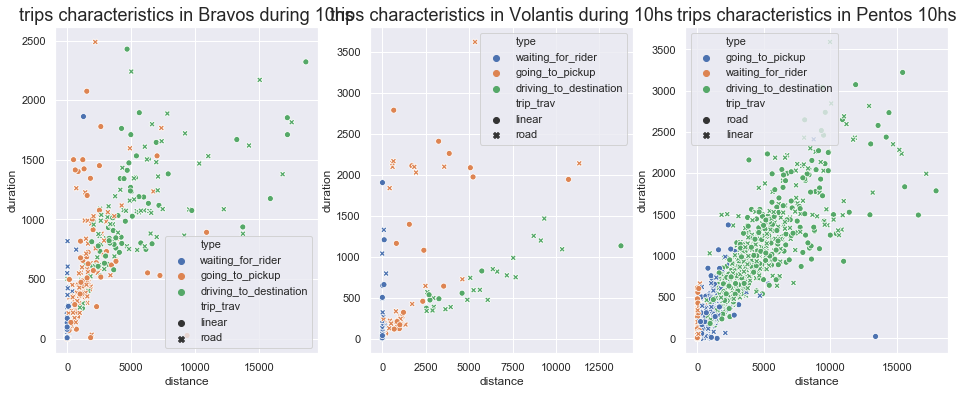

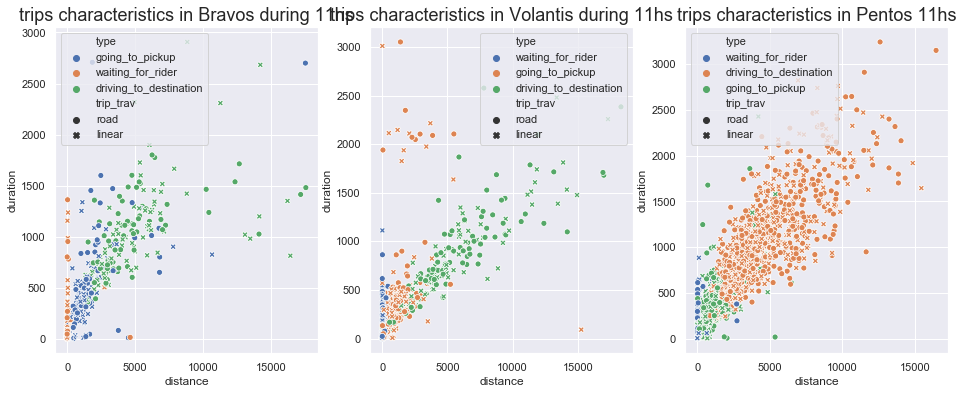

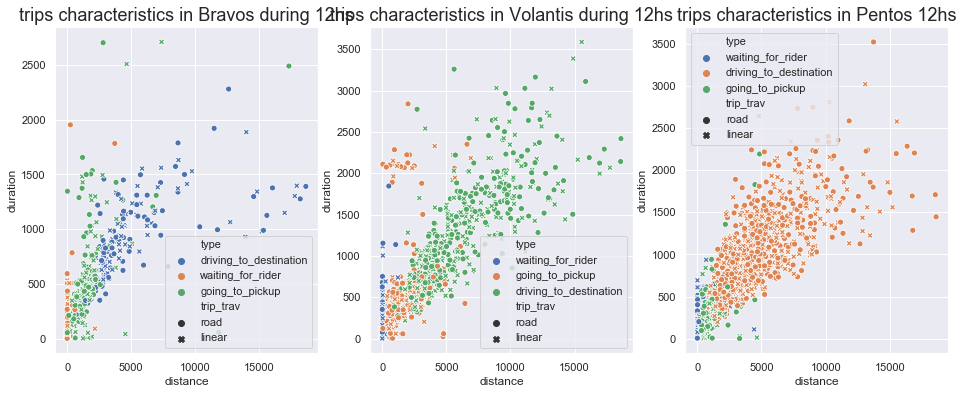

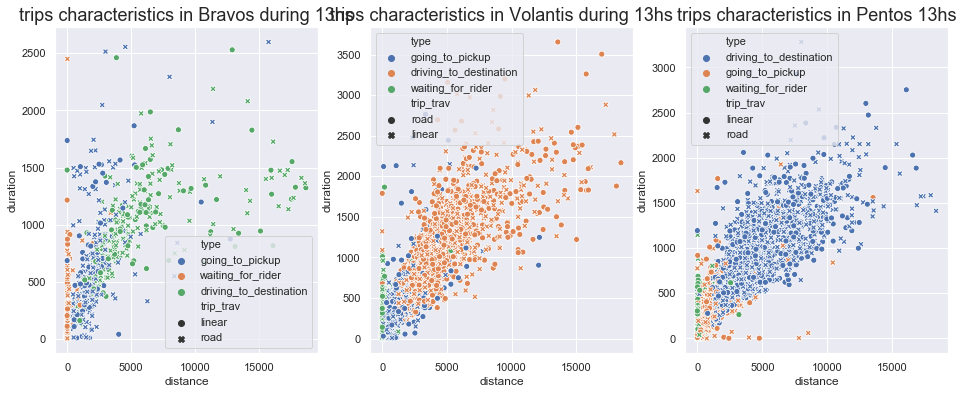

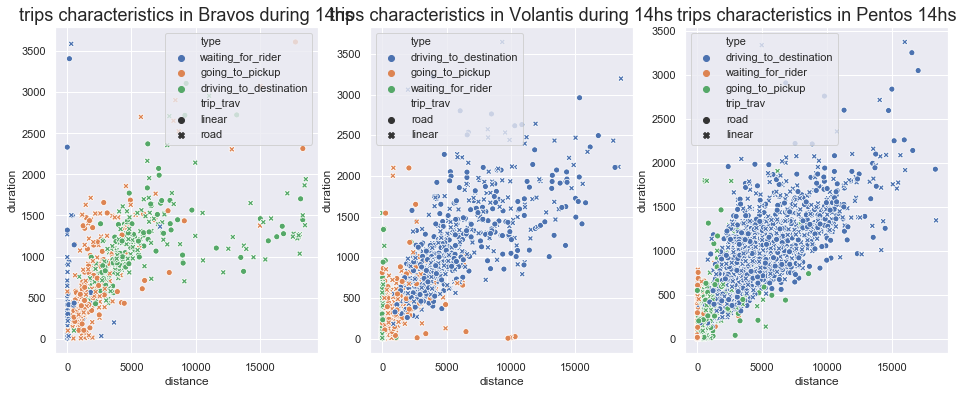

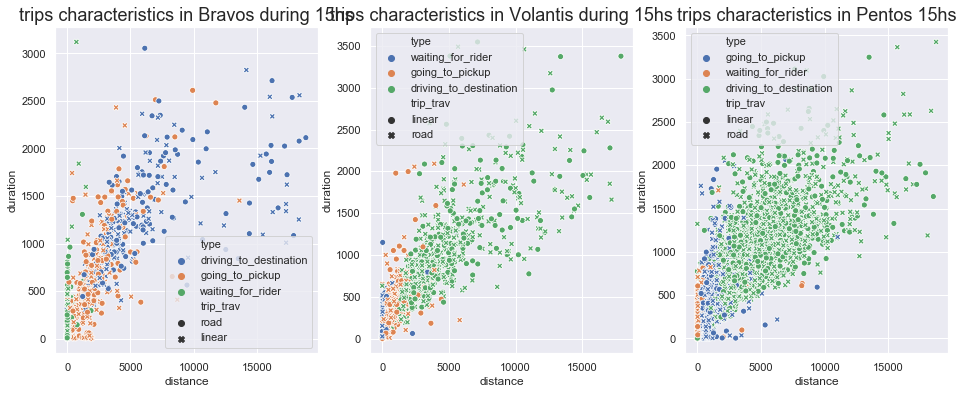

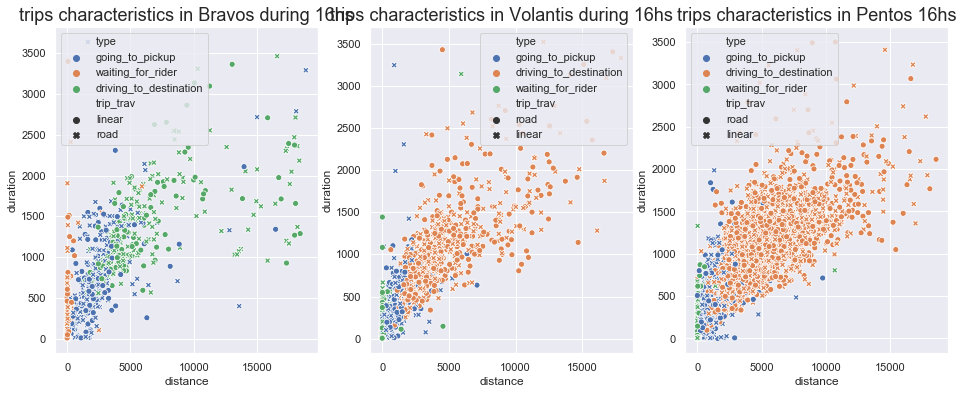

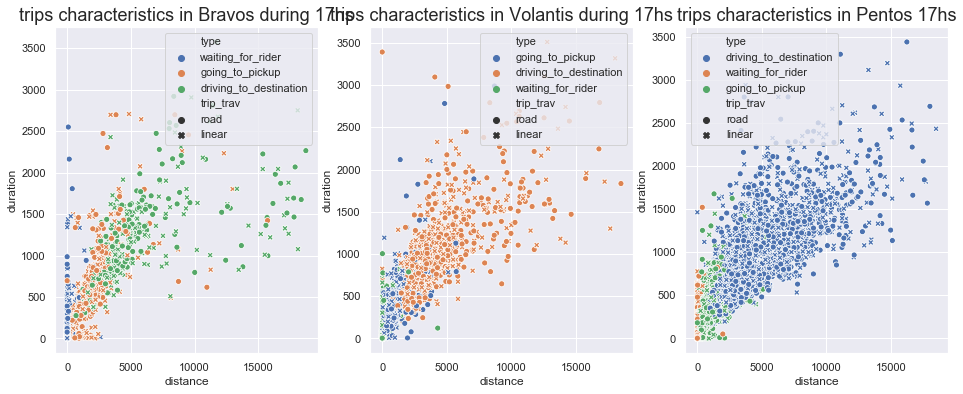

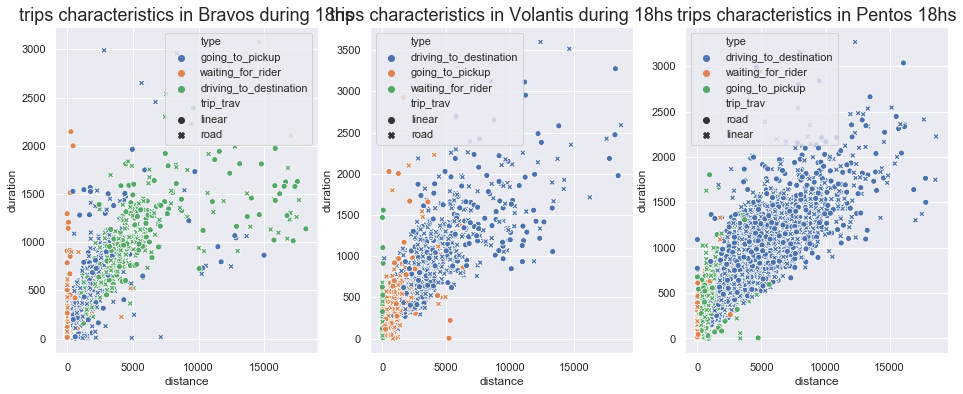

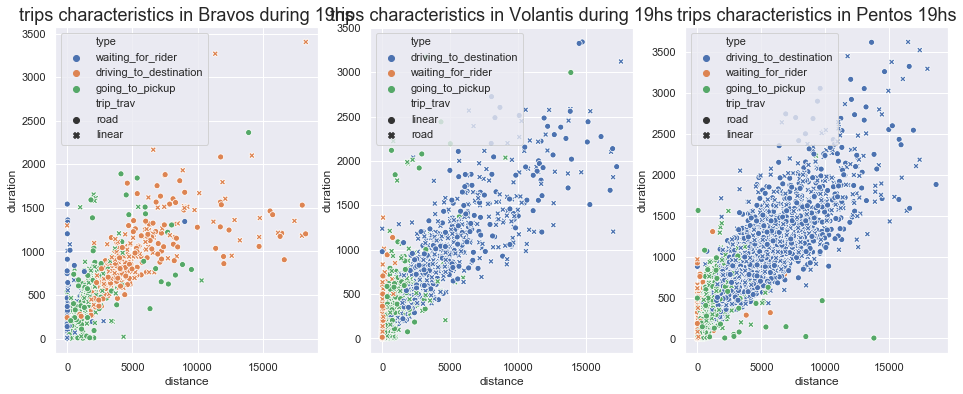

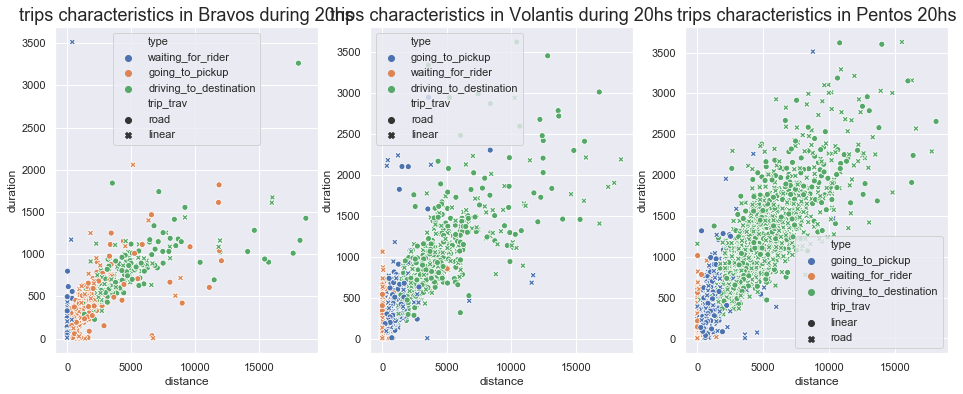

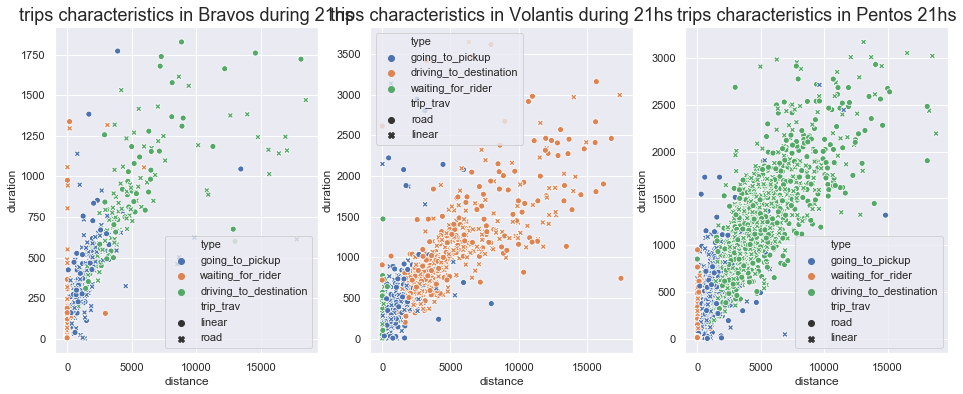

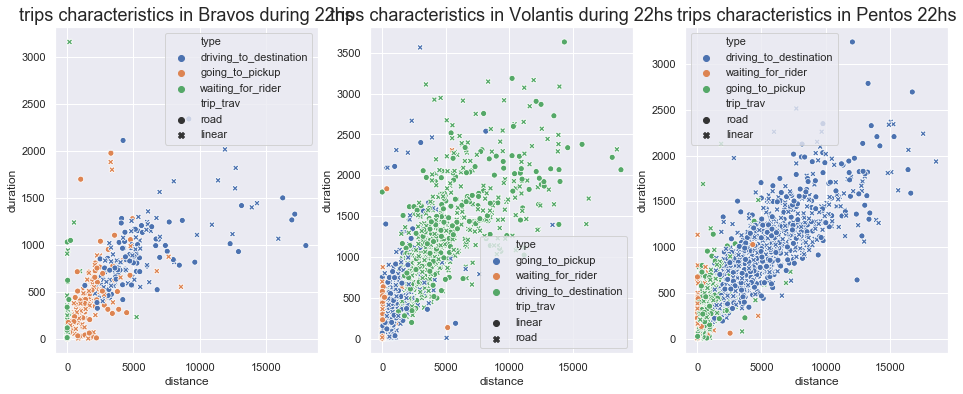

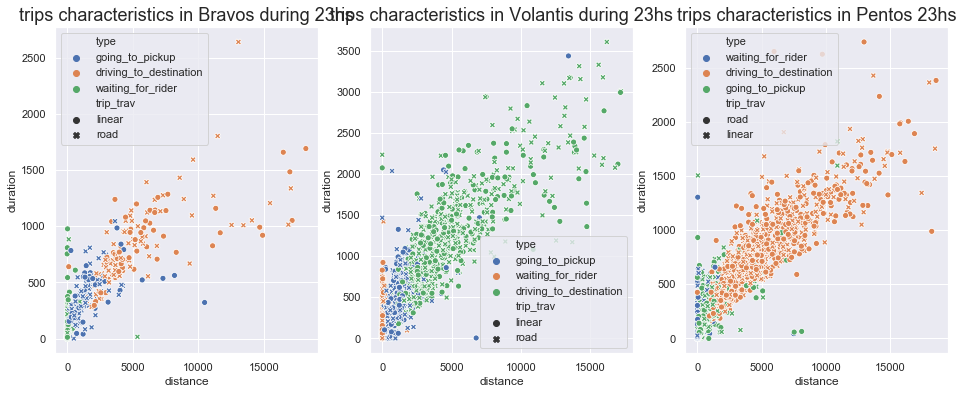

In [251]:
for i in range(24):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
    sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2.loc[(df_2.city_id=='bravos') & (df_2.trip_hour==i)], ax=ax1)
    ax1.set_title(f'trips characteristics in Bravos during {i}hs', fontsize=18)
    sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2.loc[(df_2.city_id=='volantis') & (df_2.trip_hour==i)], ax= ax2)
    ax2.set_title(f'trips characteristics in Volantis during {i}hs', fontsize=18)
    sns.scatterplot(x='distance', y='duration', hue='type', style='trip_trav', data=df_2.loc[(df_2.city_id=='pentos') & (df_2.trip_hour==i)], ax=ax3)
    ax3.set_title(f'trips characteristics in Pentos {i}hs', fontsize=18)

1. Should the company move towards road distance? What's the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)

In [259]:
df_piv.reset_index(inplace=True)
df_piv.columns = df_piv.columns = ['_'.join(col) for col in df_piv.columns]
df_piv

city_id_ trip_trav_                   type_  distance_max  distance_mean  \
0     bravos     linear  driving_to_destination       18804.0    5668.525063   
1     bravos     linear         going_to_pickup       18323.0    1822.867451   
2     bravos     linear       waiting_for_rider        5243.0      57.410921   
3     bravos       road  driving_to_destination       18851.0    5715.083204   
4     bravos       road         going_to_pickup       18839.0    1873.476476   
5     bravos       road       waiting_for_rider        9124.0      76.344308   
6     pentos     linear  driving_to_destination       18822.0    4038.858246   
7     pentos     linear         going_to_pickup       13515.0     697.776210   
8     pentos     linear       waiting_for_rider       10683.0      34.572942   
9     pentos       road  driving_to_destination       18748.0    4044.295218   
10    pentos       road         going_to_pickup       14837.0     706.360121   
11    pentos       road       waiting_for_rider       12940.0      34.563834   
12  volantis     linear  driving_to_destination       18785.0    4949.148060   
13  volantis     linear         going_to_pickup       15278.0     864.362417   
14  volantis     linear       waiting_for_rider        6722.0      36.535331   
15  volantis       road  driving_to_destination       18771.0    4981.765301   
16  volantis       road         going_to_pickup       13398.0     839.576373   
17  volantis       road       waiting_for_rider        8403.0      41.247073   

    distance_min  distance_std  duration_max  duration_mean  duration_min  \
0            0.0   4164.990472        3577.0    1025.138734           4.0   
1            0.0   1868.243605        3615.0     545.832157           0.0   
2            0.0    263.210934        3513.0     145.201296           2.0   
3            0.0   4276.247084        3465.0    1013.107198           3.0   
4            0.0   1955.637625        3639.0     561.359904           0.0   
5            0.0    456.872602        3592.0     131.478809           2.0   
6            0.0   2801.623994        3620.0     852.640781           3.0   
7            0.0    654.959414        2943.0     252.221429           0.0   
8            0.0    198.681802        1330.0      57.934647           1.0   
9            0.0   2782.983118        3630.0     849.366978           3.0   
10           0.0    663.837215        3512.0     252.385885           0.0   
11           0.0    201.870973        1825.0      58.604385           0.0   
12           0.0   3457.237445        3648.0    1029.560776           3.0   
13           0.0    997.703831        3438.0     326.428329           0.0   
14           0.0    212.760637        3141.0     100.259972           2.0   
15           0.0   3481.884012        3658.0    1035.561767           4.0   
16           0.0    930.710317        3623.0     317.449131           0.0   
17           0.0    234.186155        2308.0      96.001351           2.0   

    duration_std  
0     487.326233  
1     446.648989  
2     305.895723  
3     485.490492  
4     488.039413  
5     260.803834  
6     472.772989  
7     184.581333  
8      96.209904  
9     467.269398  
10    182.593829  
11    100.461115  
12    573.809104  
13    317.777067  
14    165.044343  
15    578.412437  
16    313.677713  
17    153.211929

we asume that the distance is counted in meters and the duration in seconds. for each city the mean is diferent, the driving distance is around 5km. for each city, and it is the most significatly one of the three types. the difference between linear and road, is not very singnificant, this can be mora appreciated with the duration_means. they have really similars numbers

In [260]:
df_piv.distance_mean/1000

0     5.668525
1     1.822867
2     0.057411
3     5.715083
4     1.873476
5     0.076344
6     4.038858
7     0.697776
8     0.034573
9     4.044295
10    0.706360
11    0.034564
12    4.949148
13    0.864362
14    0.036535
15    4.981765
16    0.839576
17    0.041247
Name: distance_mean, dtype: float64

In [262]:
df_piv.duration_mean/60

0     17.085646
1      9.097203
2      2.420022
3     16.885120
4      9.355998
5      2.191313
6     14.210680
7      4.203690
8      0.965577
9     14.156116
10     4.206431
11     0.976740
12    17.159346
13     5.440472
14     1.671000
15    17.259363
16     5.290819
17     1.600023
Name: duration_mean, dtype: float64

In [268]:
df_2_piv.loc[df_2_piv.distance_mean >= 10000]

city_id_ trip_trav_                   type_  trip_hour_  distance_max  \
3   bravos     linear  driving_to_destination           3       18526.0   

   distance_mean  distance_min  distance_std  duration_max  duration_mean  \
3        10680.9        1408.0   6006.409808        1606.0    1002.566667   

   duration_min  duration_std  
3         251.0    323.313628

### conclusion
to reduce to the road api call,the approche that we can give to the API call is regarding the mean velocity during the day when the mean velocity, is less than 10 km/h the api road will be really usefull to avoid the traffic congestion.

In [283]:
df_2_piv['mean_vel']=(df_2_piv.distance_mean/1000)/(df_2_piv.duration_mean/60)*60
df_2_piv.loc[df_2_piv.mean_vel <= 10]

city_id_ trip_trav_              type_  trip_hour_  distance_max  \
25     bravos     linear    going_to_pickup           1        8227.0   
26     bravos     linear    going_to_pickup           2        4294.0   
28     bravos     linear    going_to_pickup           4        8342.0   
29     bravos     linear    going_to_pickup           5        9956.0   
48     bravos     linear  waiting_for_rider           0         455.0   
..        ...        ...                ...         ...           ...   
427  volantis       road  waiting_for_rider          19         939.0   
428  volantis       road  waiting_for_rider          20        5034.0   
429  volantis       road  waiting_for_rider          21        2534.0   
430  volantis       road  waiting_for_rider          22        5491.0   
431  volantis       road  waiting_for_rider          23        1787.0   

     distance_mean  distance_min  distance_std  duration_max  duration_mean  \
25     1240.263158           0.0   1466.665508        2454.0     502.763158   
26      982.073529           0.0    986.522708        2384.0     384.764706   
28     1753.446429           0.0   1636.935084        2725.0     871.500000   
29     2394.081081         302.0   1669.255660        2589.0     957.000000   
48       39.468085           0.0     81.915877         440.0      70.978723   
..             ...           ...           ...           ...            ...   
427      28.484791           0.0     88.408181        1362.0      84.549430   
428      41.387409           0.0    263.752228        1065.0      94.113801   
429      45.156997           0.0    183.710787        1471.0      95.686007   
430      45.914634           0.0    303.469957        2308.0      94.480488   
431      34.847500           0.0    150.591946        1424.0      88.000000   

     duration_min  duration_std  mean_vel  
25            2.0    565.898732  8.880817  
26            1.0    399.925520  9.188641  
28            2.0    637.915298  7.243152  
29           96.0    515.394888  9.005948  
48            3.0    107.066109  2.001799  
..            ...           ...       ...  
427           2.0    143.502648  1.212844  
428           2.0    147.528833  1.583133  
429           2.0    154.670364  1.698944  
430           2.0    177.940379  1.749490  
431           2.0    145.695893  1.425580  

[201 rows x 13 columns]

2. How would you improve the experimental design? Would you collect any additional data?

the time data were really usefull to understand the rythm of the query and in parallel the traffic rythm, we can asume it as a sample of the movility status during the day. by understanding this, we are able to pay attention to the more problematics situations and choose to improve the services in those cases. however, in each one of the cities, the responses of  the two services are similar. we can see that the points in each scatter plot,the points are distributed in the same way. to imporvit, the geolocated points can be added, to have a complete idea of the traffic distribution in each city. that will alow us to be more specific with the API querys use, and be more selective in that sense.